In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
ride_percity_data_df= ride_data_df.drop_duplicates('city')
ride_city_data_df = pd.merge(ride_percity_data_df, city_data_df,on = 'city')

# Display the data table for preview
ride_city_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types
rides_number_percity = ride_data_df.groupby('city')['fare'].count()
rides_number_percity_df = rides_number_percity.to_frame().reset_index()
rides_number_percity_df = rides_number_percity_df.rename(columns = {'fare':'rides number'})

ride_city_data_df = pd.merge(ride_city_data_df,rides_number_percity_df, on ='city' )

ride_city_data_df.head()

    

,city,date,fare,ride_id,driver_count,type,rides number
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban,24
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban,31
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban,25
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban,23
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban,19


In [3]:
average_fare_percity = ride_data_df.groupby('city')['fare'].mean()
average_fare_percity_pd = average_fare_percity.to_frame().reset_index()
average_fare_percity_pd = average_fare_percity_pd.rename(columns = {'fare':'average fare'})

ride_city_averagefare_df = pd.merge(ride_city_data_df, average_fare_percity_pd, on = 'city')

ride_city_averagefare_df.head()

,city,date,fare,ride_id,driver_count,type,rides number,average fare
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban,24,23.425833
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban,31,24.451613
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban,25,25.642800
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban,23,28.616957
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban,19,22.965263


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `matplotlib.transforms.Bbox`
  clip_on: bool
  clip_path: { (`.path.Path`, `.transforms.Transform`), `.patches.Patch`, None } 
  color: color
  contains: callable
  figure: `.Figure`
  fontfamily: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties: `.font_manager.FontProperties`
  fontsize: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle: {'normal', 'italic', 'oblique'}
  fontvariant: {'n

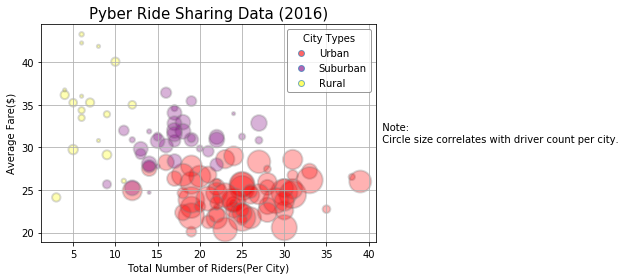

In [4]:
# Incorporate the other graph properties
colors = {
        'Urban':'red',
        'Suburban':'purple',
        'Rural':'yellow',
        }

color_type = []

for i in range(len(ride_city_averagefare_df['type'])):
    color_type.append(colors[ride_city_averagefare_df['type'][i]])
    
    
# Build the scatter plots for each city types
plt.scatter(x = ride_city_averagefare_df['rides number'],
            y = ride_city_averagefare_df['average fare'],
            s = ride_city_averagefare_df['driver_count']*10,
            c = color_type,
            cmap="Blues", alpha=0.3, edgecolors="grey", linewidth=2)

plt.title('Pyber Ride Sharing Data (2016)', fontsize=15)
plt.xlabel('Total Number of Riders(Per City)')
plt.ylabel('Average Fare($)')
plt.grid(True)


#create a legend

legend_line2d = []
legend_line2d.append(mlines.Line2D([0], [0],
                                    linestyle='none',
                                    marker='o',
                                    alpha=0.6,
                                    markerfacecolor='red'))
legend_line2d.append(mlines.Line2D([0], [0],
                                    linestyle='none',
                                    marker='o',
                                    alpha=0.6,
                                    markerfacecolor='purple'))
legend_line2d.append(mlines.Line2D([0], [0],
                                    linestyle='none',
                                    marker='o',
                                    alpha=0.6,
                                    markerfacecolor='yellow'))
 
legend = plt.legend(legend_line2d,
                    ['Urban','Suburban','Rural'],
                    title='City Types',
                    loc='upper right',
                    frameon=True, 
                    edgecolor = 'grey',
                    )

plt.setp(legend.get_title())


# Incorporate a text label regarding circle size
Notes = '  Note: \n  Circle size correlates with driver count per city.'

plt.text(1.0, 0.5, Notes, {'color': 'black', 'fontsize': 10},
         horizontalalignment='left',
         verticalalignment='center',
         rotation=0,
         clip_on=False,
         transform=plt.gca().transAxes)


# Save Figure
plt.savefig('pyber_ride_sharing_data.png', bbox_inches='tight')

# Show Figure
plt.show()

## Total Fares by City Type

In [5]:
# Calculate Type Percents
ride_city_all_df = pd.merge(city_data_df, ride_data_df, on = 'city')
total_fare_pertype = ride_city_all_df.groupby('type')['fare'].sum()
total_fare_pertype_df = total_fare_pertype.to_frame().reset_index()

type_list = list(total_fare_pertype_df.type)
total_fare = list(total_fare_pertype_df.fare)



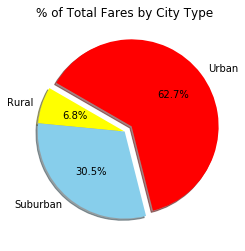

In [10]:
# Build Pie Chart
colors = ['yellow','skyblue','red']
explode = [0,0,0.1]
sizes = total_fare
labels = type_list

plt.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',shadow=True, startangle=150)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('total_fare_city_type.png', bbox_inches='tight')

# Show Figure
plt.show()

## Total Rides by City Type

In [7]:
# Calculate Ride Percents
total_rides_pertype = ride_city_averagefare_df.groupby('type')['rides number'].sum()
total_rides_pertype_df = total_rides_pertype.to_frame().reset_index()

type_list = list(total_rides_pertype_df['type'])
total_rides = list(total_rides_pertype_df['rides number'])

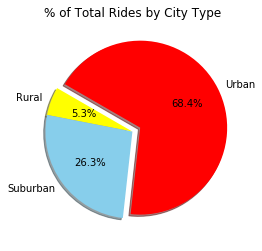

In [11]:
# Build Pie Chart
colors = ['yellow','skyblue','red']
explode = [0,0,0.1]
sizes = total_rides
labels = type_list

plt.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',shadow=True, startangle=150)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('total_rides_city_type.png', bbox_inches='tight')

# Show Figure
plt.show()


## Total Drivers by City Type

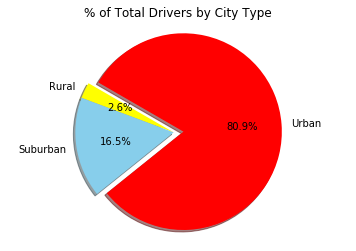

In [9]:
# Calculate Driver Percents
total_drivers_pertype = ride_city_averagefare_df.groupby('type')['driver_count'].sum()
total_drivers_pertype_df = total_drivers_pertype.to_frame().reset_index()

type_list = list(total_drivers_pertype_df['type'])
total_drivers = list(total_drivers_pertype_df['driver_count'])

# Build Pie Charts
colors = ['yellow','skyblue','red']
explode = [0,0,0.1]
sizes = total_drivers
labels = type_list

plt.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',shadow=True, startangle=150)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of Total Drivers by City Type')

# Show Figure
plt.savefig('total_drivers_city_type.png', bbox_inches='tight')
plt.show()

